In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Conectar-se ao banco de dados SQLite
conn = sqlite3.connect('treino_1.db')

# Ler dados das tabelas Clientes, DadosPessoais e HistoricoCompras
df_clientes = pd.read_sql_query('SELECT * FROM Clientes', conn)
df_dados_pessoais = pd.read_sql_query('SELECT * FROM DadosPessoais', conn)
df_compras = pd.read_sql_query('SELECT * FROM HistoricoCompras', conn)



In [7]:
# Listar todas as tabelas no banco de dados
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

# Verificar a estrutura da tabela 'Clientes'
if 'Clientes' in tables['name'].values:
    table_info = pd.read_sql_query("PRAGMA table_info(Clientes);", conn)
    display(table_info)


# Fechar a conexão com o banco de dados
conn.close()

               name
0          Clientes
1     DadosPessoais
2  HistoricoCompras


,cid,name,type,notnull,dflt_value,pk
0,0,ID,INTEGER,0,None,1
1,1,Nome,TEXT,0,None,0
2,2,Idade,INTEGER,0,None,0
3,3,Email,TEXT,0,None,0


In [11]:
# Análise exploratória de dados
# 1. Visualizar as primeiras linhas dos DataFrames
print("Clientes:")
display(df_clientes.head())

Clientes:


,ID,Nome,Idade,Email
0,1,Mrs. Emily Quinn,78,jennifernelson@example.net
1,2,Natalie Watson,76,kimberlyalexander@example.org
2,3,Drew Bowen,29,thomasjessica@example.net
3,4,Alexa Powers,43,tammyolson@example.net
4,5,Denise Poole,63,bjames@example.org


In [10]:
print("\nDados Pessoais:")
display(df_dados_pessoais.head())


Dados Pessoais:


,ClienteID,Endereco,Telefone
0,1,"1226 Holmes Inlet\nChapmanville, MO 63158",+1-469-229-9559x7541
1,2,"401 Rodriguez Plaza\nSheltonmouth, OH 59247",001-310-965-5453x02895
2,3,"984 Jonathan Walks\nEast Christopher, VA 74543",934-724-2462
3,4,"6396 Tanya Passage Apt. 756\nPetersburgh, ND 5...",001-586-981-0357x6884
4,5,1090 Tyler Underpass Suite 137\nNew Justinfurt...,7934345481


In [12]:
print("\nHistórico de Compras:")
display(df_compras.head())


Histórico de Compras:


,CompraID,ClienteID,Produto,Valor,DataCompra
0,1,1,site,49,2023-04-11
1,2,2,art,87,2023-01-17
2,3,3,choice,22,2023-09-02
3,4,4,there,87,2023-02-27
4,5,5,hair,86,2023-05-22


In [13]:
# 2. Estatísticas descritivas
print("\nEstatísticas Descritivas para Idade dos Clientes:")
print(df_clientes['Idade'].describe())


Estatísticas Descritivas para Idade dos Clientes:
count    100.000000
mean      49.930000
std       19.246018
min       19.000000
25%       34.750000
50%       46.000000
75%       69.000000
max       80.000000
Name: Idade, dtype: float64


In [14]:
# 3. Contagem de compras por cliente
compras_por_cliente = df_compras['ClienteID'].value_counts()
print("\nContagem de Compras por Cliente:")
print(compras_por_cliente)


Contagem de Compras por Cliente:
ClienteID
1      1
64     1
74     1
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: count, Length: 100, dtype: int64


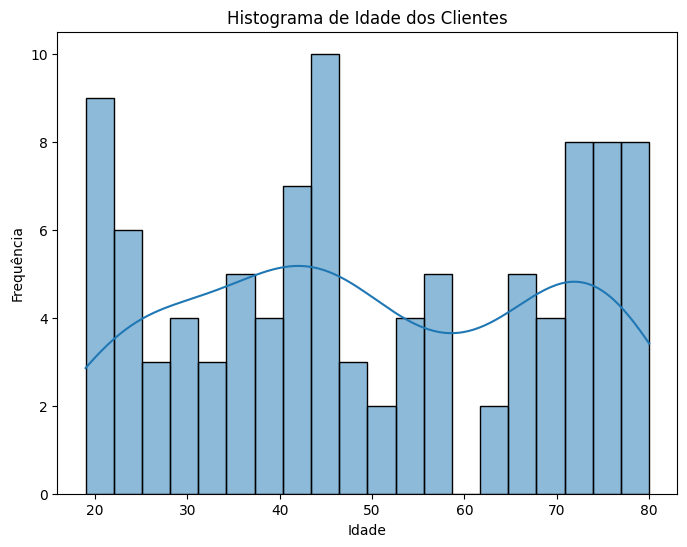

In [15]:
# 4. Visualização: Histograma de Idade dos Clientes
plt.figure(figsize=(8, 6))
sns.histplot(df_clientes['Idade'], bins=20, kde=True)
plt.title('Histograma de Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

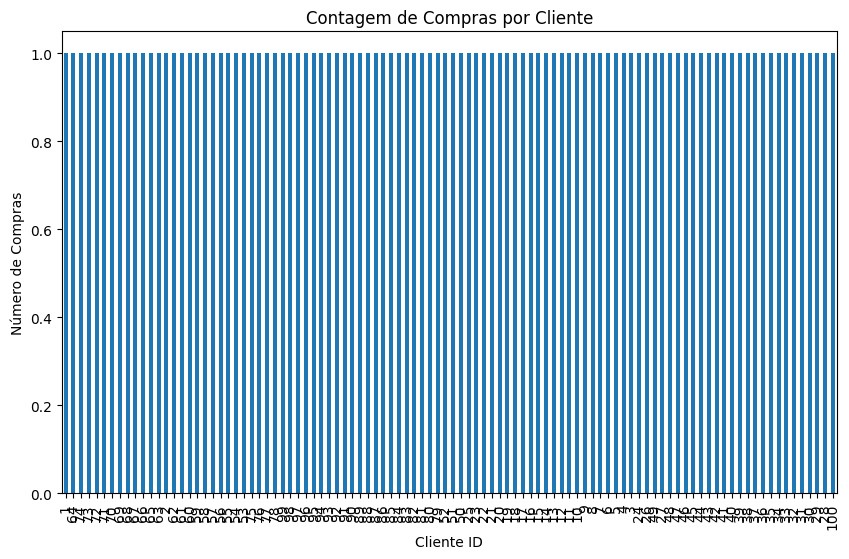

In [16]:
# 5. Visualização: Gráfico de barras de contagem de compras por cliente
plt.figure(figsize=(10, 6))
compras_por_cliente.plot(kind='bar')
plt.title('Contagem de Compras por Cliente')
plt.xlabel('Cliente ID')
plt.ylabel('Número de Compras')
plt.show()

In [17]:
# 6. Join dos DataFrames para análise combinada
df_completo = pd.merge(df_clientes, df_dados_pessoais, how='inner', left_on='ID', right_on='ClienteID')
df_completo = pd.merge(df_completo, df_compras, how='left', left_on='ID', right_on='ClienteID')

In [ ]:
# 7. Análise de correlação entre idade e valor das compras
correlacao_idade_valor_compras = df_completo[['Idade', 'Valor']].corr()
print("\nCorrelação entre Idade dos Clientes e Valor das Compras:")
print(correlacao_idade_valor_compras)

In [ ]:
# 8. Visualização: Scatter plot de idade versus valor das compras
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Idade', y='Valor', data=df_completo)
plt.title('Scatter Plot: Idade versus Valor das Compras')
plt.xlabel('Idade dos Clientes')
plt.ylabel('Valor das Compras')
plt.show()